# Foundations of Applied Mathematics: Introduction to Numerical Methods

In [35]:
import numpy as np
import matplotlib.pyplot as plt

## Definition of Numerical Methods

Most high school math classes (e.g. algrebra, calculus) focus on analytical techniques. Consider the following quadratic:
$$ 0 = x^2 + 4x + 3$$

From algebra, we know that we can solve for the roots of this equation analytically!
- Method 1: factor the right hand side to get $(x + 1)(x+ 3)$
- Method 2: Use the quadratic equation which is a general solution for all quadratic roots

However, some problems that fall into one or more of the following categories:
1. No analytical solution
2. Difficult to compute by hand (e.g. large linear systems)
3. Open ended, not closed form

How would you solve for the roots of a higher degree polynomial such as $x^7 + x^5 + 2x + 3$? 

How would you solve a linear system with many (e.g. >> 10) equations? 

What about quantifying trends from real life data with minimal assumptions? 

These are all types of problems that benefit from numerical methods.

## Root Finding Algorithms

We will start our exploration of these topics with root finding algorithms! Let's look at an example case.

Let $f(x) = x^3 - 6x + 2$. This means that the first derivative (i.e. its rate of change) and second derivative (i.e. the "concavity") are as follows:
$$f'(x) = 3x^2 - 6$$
$$f''(x) = 6x$$

In [98]:
f = lambda x: x**3 - 6*x + 2
df = lambda x: 3*x**2 - 6       # first derivative
ddf = lambda x: 6*x             # second derivative

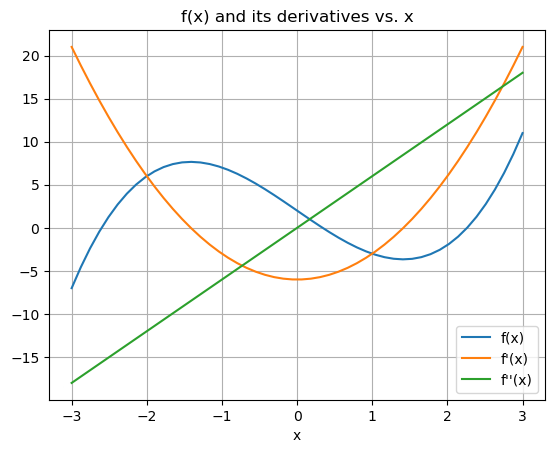

In [97]:
x = np.linspace(-3,3)
plt.plot(x, f(x), label="f(x)")
plt.plot(x, df(x), label="f'(x)")
plt.plot(x, ddf(x), label="f''(x)")
plt.title("f(x) and its derivatives vs. x")
plt.xlabel("x")
plt.grid()
plt.legend()
plt.show()

### Q: What do you notice about where $f'(x)$ and $f''(x)$ cross zero? What is $f(x)$ doing at those points?

### A: YOUR ANSWER HERE

### Analytical solution
For a general cubic function in the form
$$f(x) = ax^3 + bx^2 + cx + d$$

and its first derivative is of the form
$$f(x) = 3ax^2 + 2bx + c$$

The **inflection points** of $f(x)$ (i.e. where it changes directions) are where $f'(x) = 0$.

### Q: We want to solve $0 = 3ax^2 + 2bx + c$. Please solve using the quadratic equation.

### A: YOUR ANSWER HERE

### Q: What are the exact inflection points for our example case if $f'(x) = 3x^2 - 6$?

### A: YOUR ANSWER HERE

### Bisection Method

The **bisection method** is based on the following idea:

Imagine I have a function $f(x)$ over some interval $[a,b]$. If there is a sign change between $f(a)$ and $f(b)$, there there must be a point that crosses zero between $a$ and $b$! We will interatively shrink this bracket until we narrow in on a numerical solution.

In [123]:
def bisection_method(f,a,b,tol=1e-5):
    """
    f: callable function handle
    a: minimum of interval [a,b]
    b: maximum of interval [a,b]
    tol: how close to the real value we want our answer to be
    """
    MAX_STEPS = 1000
    eps = np.finfo(float).eps
    
    # initialize
    c = (a + b)/2.
    c_array = [ c ]
    
    f_a = f(a)
    f_b = f(b)
    f_c = f(c)
    
    # check that there is a sign change over the interval [a,b]
    if np.sign(f_a) == np.sign(f_b):
        raise ValueError("no bracket: f(a) and f(b) must have different signs")
        
    # Loop until we reach the TOLERANCE or we take MAX_STEPS
    for step in range(1, MAX_STEPS + 1):
        # Check if tolerance has been met
        if np.abs(f_c) < tol or np.abs(b - a) < eps*c:
            break
        
        # update bracket values
        if np.sign(f_a) != np.sign(f_c):
            b = c
            f_b = f_c
        else:
            a = c
            f_a = f_c
        c = (a + b)/2.
        f_c = f(c)
        c_array.append(c)
        
    if step == MAX_STEPS:
        print('Maximum number of steps exceeded')
    
    return c, np.array(c_array)

From our example above, let's choose the sub-interval [-1,1] to find the middle root. 

Note: we could change the interval to find each of the 3 roots that we see in the plot!

In [ ]:
# call the bisection method!
root, root_iter = bisection_method(f,-1,1)

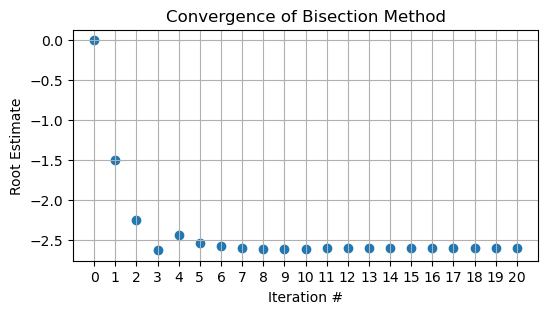

In [122]:
plt.figure(figsize=(6,3))
plt.scatter(range(len(root_iter)), root_iter)
plt.title("Convergence of Bisection Method")
plt.ylabel("Root Estimate")
plt.xlabel("Iteration #")
plt.xticks(range(len(root_iter)))
plt.grid()
plt.show()

Great! We have a method to numerically determine where a function crosses zero. Let's use this to numerically solve for the inflection points of $f(x)$.

### Q: choose appropriate [a,b] to find the x value where f(x) is at its maximum
Note: think carefully about what function to give `bisection_method`!

### A:

In [ ]:
# extrem1, extrem_iter1 = bisection_method( func, a, b )             
# print("The MAXIMUM value of f(x) occurs when x = {}".format(extrem1))

### Q: Now choose appropriate [a,b] to find the x value where f(x) is at its minimum

### A:

In [132]:
# extrem2, extrem_iter2 = bisection_method( func, a, b )             
# print("The MINIMUM value of f(x) occurs when x = {}".format(extrem2))

## Errors and Precision

Now that we've established some reasons for using computers to assist in certain cases, we should discuss some of the sources of error that can occur when using these methods, how we can quantify error, and some special cases to beware of.

### Basic Formulas for Quantifying Error

Before discussing the different sources of error, it's important to define the ways that error is measured. 

Given a true value of a function $f$ and an approximate solution $F$:

**Absolute Error**
$$
    e = | f - F |
$$

**Relative Error**
$$
    r = \frac{e}{|f|} = \frac{|f - F|}{|f|}
$$

Both equations take the absolute difference of the expected/true value and the approximate/measured value, but relative error is scaled by the magnitude of the expected value in the denominator.

### Q: What are the absolute and relative errors for our root finding method above? Compare the results from the bisection method to the analytical inflection points!

### A: YOUR ANSWER HERE

### Sources of Error
|Type| Description|Example|
|--|--|--|
|Measurement| instrument/human error when measuring an observation | A kitchen scale that's only accurate to $\pm$ 1g|
|Floating point| approximating numbers with finite precision| Computers have a smallest decimal value they can represent|
|Truncation| infinite expansion approximated by a finite one | Using a Taylor's series to approximate 

We'll dive into floating point errors in more depth next.

### Real Systems - IEEE 754 Binary Floating Point Systems

### Python Access to IEEE Numbers

Let's use the `numpy` package to demonstrate explore these floating point systems

In [26]:
import numpy

In [ ]:
# single precision
print(numpy.finfo(numpy.float32))

Machine parameters for float32
---------------------------------------------------------------
precision =   6   resolution = 1.0000000e-06
machep =    -23   eps =        1.1920929e-07
negep =     -24   epsneg =     5.9604645e-08
minexp =   -126   tiny =       1.1754944e-38
maxexp =    128   max =        3.4028235e+38
nexp =        8   min =        -max
smallest_normal = 1.1754944e-38   smallest_subnormal = 1.4012985e-45
---------------------------------------------------------------



In [29]:
# double precision
print(numpy.finfo(numpy.float64))

Machine parameters for float64
---------------------------------------------------------------
precision =  15   resolution = 1.0000000000000001e-15
machep =    -52   eps =        2.2204460492503131e-16
negep =     -53   epsneg =     1.1102230246251565e-16
minexp =  -1022   tiny =       2.2250738585072014e-308
maxexp =   1024   max =        1.7976931348623157e+308
nexp =       11   min =        -max
smallest_normal = 2.2250738585072014e-308   smallest_subnormal = 4.9406564584124654e-324
---------------------------------------------------------------



In [27]:
eps = numpy.finfo(float).eps
MAX = numpy.finfo(float).max
print('eps = {}'.format(eps))
print('MAX = {}'.format(MAX))

eps = 2.220446049250313e-16
MAX = 1.7976931348623157e+308


## Why should we care about this?

 - Floating point arithmetic is not commutative or associative
 - Floating point errors compound, do not assume even double precision is enough!
 - Mixing precision can be  dangerous

### Example: Simple Arithmetic
 
Simple arithmetic $\delta < \epsilon_{\text{machine}}$. 

Compare

   $$1+\delta - 1 \quad vs. \quad 1 - 1 + \delta$$

In [34]:
eps = numpy.finfo(float).eps
delta = 0.5*eps
x = 2*delta + 1
y = 1 + delta + delta
print('2 * delta + 1 = {}'.format(x))
print('1 + delta + delta = {}'.format(y))
print( x == y)

2 * delta + 1 = 1.0000000000000002
1 + delta + delta = 1.0
False


For more in depth information about error and floating point systems, check out [this jupyter notebook](https://github.com/mspieg/intro-numerical-methods/blob/master/04_error.ipynb)

## Credit
Sections of this notebook are based on the work of Marc Spiegelman and Kyle Mandli. The entirety of their course repository can be found [here](https://github.com/mspieg/intro-numerical-methods/tree/master)